## Handwritten digits classification using neural network
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

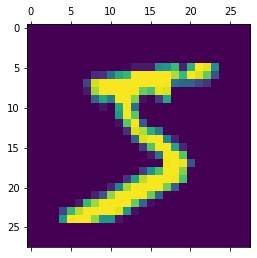

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

## Very simple neural network with no hidden layers

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4682 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9256


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9239


[0.2681673467159271, 0.9239000082015991]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.0666961e-02, 4.2073833e-07, 7.7497758e-02, 9.5341724e-01,
       2.9691206e-03, 1.2613995e-01, 1.3765094e-06, 9.9978441e-01,
       7.4524455e-02, 7.0666414e-01], dtype=float32)

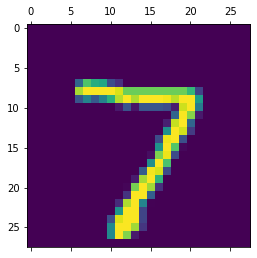

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    6,    4,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  926,   22,    8,    5,   10,   10,   33,    4],
       [   2,    0,   17,  934,    0,   18,    2,   10,   18,    9],
       [   1,    1,    4,    1,  906,    0,   10,    3,    7,   49],
       [   8,    3,    4,   41,   11,  769,   14,    4,   29,    9],
       [  15,    3,    8,    1,    8,   14,  905,    2,    2,    0],
       [   1,    5,   21,    9,    9,    0,    0,  938,    2,   43],
       [   6,   12,    6,   33,    9,   26,    8,   11,  846,   17],
       [  11,    7,    1,   11,   22,    6,    0,   12,    4,  935]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

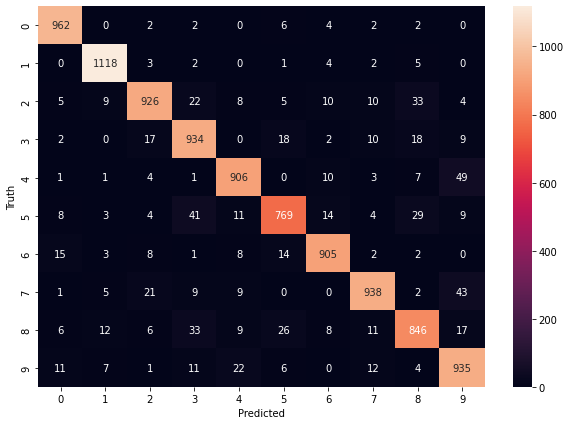

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1214 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0861 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9838


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9756


[0.08208896219730377, 0.975600004196167]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

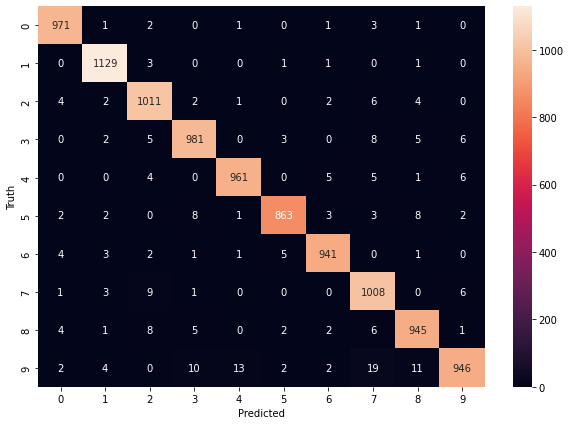

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2759 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9770


[0.07601305842399597, 0.9769999980926514]

## Now let us build a convolutional neural network to train our images

In [25]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1465 - accuracy: 0.9550
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0477 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9937


In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0334 - accuracy: 0.9901


[0.033440928906202316, 0.9901000261306763]